In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets

In [2]:
n = 5

In [3]:
inputs = keras.Input( shape = ( 32, 32, 3 ), name = 'input' )

output = layers.Conv2D( filters = 16, kernel_size = [ 7, 7 ],
                       padding = 'Same', activation = 'relu' )(inputs)

# block 1
for _ in range( n ):
    output = layers.Conv2D( filters = 16, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(output)
    output = layers.BatchNormalization()(output)
    output = layers.Activation('relu')(output)
    
    output = layers.Conv2D( filters = 16, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(output)
    output = layers.BatchNormalization()(output)
    output = layers.Activation('relu')(output)

output = layers.MaxPooling2D( pool_size = [ 3, 3 ], padding = 'same',
                               strides = 2 )(output)

In [4]:
# block 2
output = layers.ZeroPadding2D( [ 0, 8 ], 'channels_first' )(output)
for _ in range( n ):
    output = layers.Conv2D( filters = 32, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(output)
    output = layers.BatchNormalization()(output)
    output = layers.Activation('relu')(output)
    
    output = layers.Conv2D( filters = 32, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(output)
    output = layers.BatchNormalization()(output)
    output = layers.Activation('relu')(output)

output = layers.MaxPooling2D( pool_size = [ 3, 3 ], padding = 'same',
                               strides = 2 )(output)

In [5]:
# block 3
output = layers.ZeroPadding2D( [ 0, 16 ], 'channels_first' )(output)
for _ in range( n ):
    output = layers.Conv2D( filters = 64, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(output)
    output = layers.BatchNormalization()(output)
    output = layers.Activation('relu')(output)
    
    output = layers.Conv2D( filters = 64, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(output)
    output = layers.BatchNormalization()(output)
    output = layers.Activation('relu')(output)

output = layers.MaxPooling2D( pool_size = [ 3, 3 ], padding = 'same',
                               strides = 2 )(output)

In [6]:
output = layers.GlobalAveragePooling2D()(output)
output = layers.Dense( 128, activation = 'relu' )(output)
output = layers.Dense( 128, activation = 'relu' )(output)
output = layers.Dense( 10, activation = 'softmax' )(output)

In [7]:
model = keras.Model( inputs = inputs, outputs = output, name = 'resnet' )
model.summary()

Model: "resnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        2368      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64   

In [8]:
lr = 1e-3
BATCH_SIZE = 512
EPOCHS = 25

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical( y_train, 10 )
y_test = keras.utils.to_categorical( y_test, 10 )

model.compile( optimizer = keras.optimizers.RMSprop( lr, 0.9 ),
             loss = keras.losses.CategoricalCrossentropy( from_logits = True ),
              metrics = ['acc'])

In [10]:
history = model.fit( x_train, y_train, batch_size = BATCH_SIZE,
                    epochs = EPOCHS, validation_split = 0.2 )

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 15s 387us/sample - loss: 2.2056 - acc: 0.2342 - val_loss: 2.3261 - val_acc: 0.0980
Epoch 2/25
40000/40000 [==============================] - 10s 248us/sample - loss: 2.1399 - acc: 0.3117 - val_loss: 2.2442 - val_acc: 0.2055
Epoch 3/25
40000/40000 [==============================] - 10s 248us/sample - loss: 2.1134 - acc: 0.3396 - val_loss: 2.2748 - val_acc: 0.1842
Epoch 4/25
40000/40000 [==============================] - 10s 250us/sample - loss: 2.0984 - acc: 0.3554 - val_loss: 2.2636 - val_acc: 0.1945
Epoch 5/25
40000/40000 [==============================] - 10s 248us/sample - loss: 2.0849 - acc: 0.3690 - val_loss: 2.1944 - val_acc: 0.2632
Epoch 6/25
40000/40000 [==============================] - 10s 249us/sample - loss: 2.0690 - acc: 0.3859 - val_loss: 2.3557 - val_acc: 0.1035
Epoch 7/25
40000/40000 [==============================] - 10s 250us/sample - loss: 2.0562 - acc: 0.3979 

In [11]:
evaluation = model.evaluate( x_test, y_test )
print( f'loss: {evaluation[0]:.2f}, acc: {evaluation[1]*100:.2f}%' )

10000/10000 [==============================] - 2s 177us/sample - loss: 2.0349 - acc: 0.4220
loss: 2.03, acc: 42.20%


In [12]:
# model.save('resnet_RMS_lr1e3_epoch25.h5')

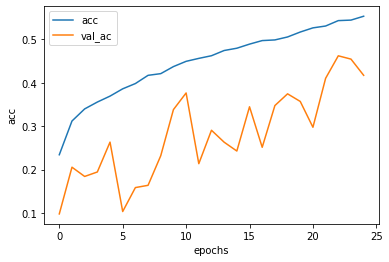

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'])
plt.xlabel( 'epochs' )
plt.ylabel( 'acc' )
plt.legend( ['acc', 'val_acc'] )

plt.savefig('plain.png')
plt.show()